In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
from functions.table import *
from functions.linear_regression import *

In [3]:
ds_with_real_temperature = '../datasets/model_output/real_data/aug2020/04-08_fine_300s_3x3x3.csv'
ds_with_artifical_temperature = '../datasets/model_output/artifical_data/finer_300s_3x3x3.csv'

input_filename = ds_with_real_temperature
max_shift = 60

In [4]:
df = pd.read_csv(input_filename, sep=',', skiprows=4)
df

,% Time (s),"Temperature (degC), Point: (0.15, 0.15, 0)","Temperature (degC), Point: (5, 0.15, 0)","Temperature (degC), Point: (9.85, 0.15, 0)","Temperature (degC), Point: (0.15, 3, 0)","Temperature (degC), Point: (5, 3, 0)","Temperature (degC), Point: (9.85, 3, 0)","Temperature (degC), Point: (0.15, 5.85, 0)","Temperature (degC), Point: (5, 5.85, 0)","Temperature (degC), Point: (9.85, 5.85, 0)",...,"Temperature (degC), Point: (0.15, 0.15, 3)","Temperature (degC), Point: (5, 0.15, 3)","Temperature (degC), Point: (9.85, 0.15, 3)","Temperature (degC), Point: (0.15, 3, 3)","Temperature (degC), Point: (5, 3, 3)","Temperature (degC), Point: (9.85, 3, 3)","Temperature (degC), Point: (0.15, 5.85, 3)","Temperature (degC), Point: (5, 5.85, 3)","Temperature (degC), Point: (9.85, 5.85, 3)","Температура окружающей среды (degC), Point: (0, 0, 0)"
0,0,20.010161,19.390399,20.276287,19.228262,18.571049,19.771813,19.717550,19.679738,19.947600,...,20.552403,20.507750,20.884379,20.208183,21.170520,20.318602,19.787509,20.422340,20.816353,17.9
1,300,19.959344,19.401906,20.220342,19.285133,18.679321,19.762286,19.698115,19.679956,19.937446,...,20.426113,20.426843,20.751428,20.152617,21.090101,20.233359,19.831373,20.349016,20.691119,17.9
2,600,19.911548,19.412577,20.167369,19.333782,18.783872,19.753406,19.678893,19.678337,19.925171,...,20.308436,20.348965,20.625497,20.096689,21.012394,20.151974,19.853503,20.276296,20.572191,17.9
3,900,19.867739,19.422559,20.120291,19.376608,18.885859,19.746418,19.660513,19.676318,19.913869,...,20.198928,20.276039,20.509391,20.041697,20.944344,20.074632,19.861944,20.206658,20.462201,17.9
4,1200,19.829976,19.431596,20.082629,19.411801,18.984514,19.742548,19.643541,19.674177,19.904944,...,20.101049,20.210853,20.408321,19.988461,20.892388,20.003173,19.853194,20.142242,20.365919,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,344400,21.263842,21.515272,21.352539,21.525605,22.531179,21.577503,21.294081,22.811214,21.394231,...,20.854677,21.027072,20.899997,20.965209,21.557944,20.959091,20.869140,21.049700,20.902364,20.0
1149,344700,21.257368,21.509705,21.345956,21.520179,22.528699,21.572039,21.287936,22.794957,21.387974,...,20.846624,21.019119,20.891652,20.957446,21.549797,20.951368,20.861293,21.041347,20.894082,19.9
1150,345000,21.250894,21.504137,21.339373,21.514753,22.526219,21.566574,21.281791,22.778700,21.381717,...,20.838572,21.011166,20.883308,20.949683,21.541651,20.943645,20.853446,21.032993,20.885800,19.9
1151,345300,21.244420,21.498570,21.332790,21.509327,22.523739,21.561110,21.275646,22.762442,21.375460,...,20.830519,21.003212,20.874964,20.941921,21.533504,20.935922,20.845599,21.024640,20.877518,19.8


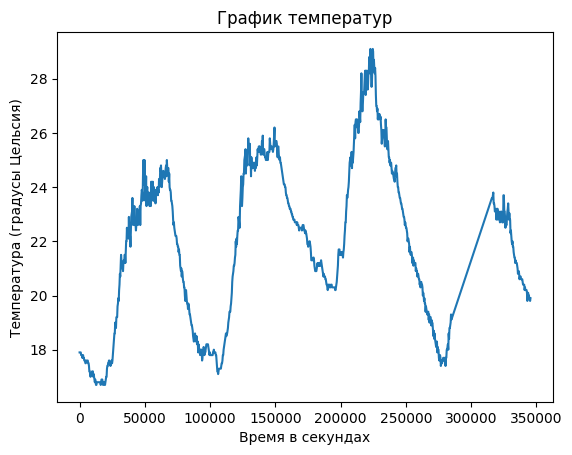

In [5]:
plt.plot(time_column(df), outer_temperature(df))
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

In [6]:
best_point, best_shift = find_best_point_and_shift(df, max_shift)

regressor, y_pred, r_squared = approximate(df, best_point, best_shift, max_shift)

print_results(df, best_point, best_shift, y_pred, r_squared, max_shift)

Лучшая точка: Point: (5, 5.85, 1.5), отсуп времени: 20 минут
Коэффициент детерминации (R^2): 0.9392279440627058 

       Время  Предсказание  Реальность
0          0     18.934411   17.900000
1        300     18.710765   17.900000
2        600     18.552211   17.900000
3        900     18.393656   17.900000
4       1200     18.235102   17.800000
...      ...           ...         ...
1088  326400     21.435155   22.500000
1089  326700     21.412092   22.674667
1090  327000     21.389030   22.600000
1091  327300     21.365968   22.600000
1092  327600     21.342905   22.900000

[1093 rows x 3 columns]


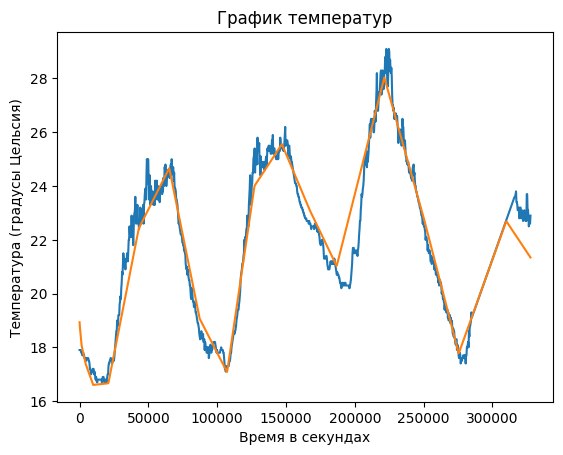

In [7]:
real = outer_temperature(df, 0, -max_shift)
time = time_column(df, 0, -max_shift)
predict = y_pred

plt.plot(time, real)
plt.plot(time, predict)
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

In [8]:
result = sorted(calc_all_points_and_shifts(df, max_shift), key=itemgetter(0))

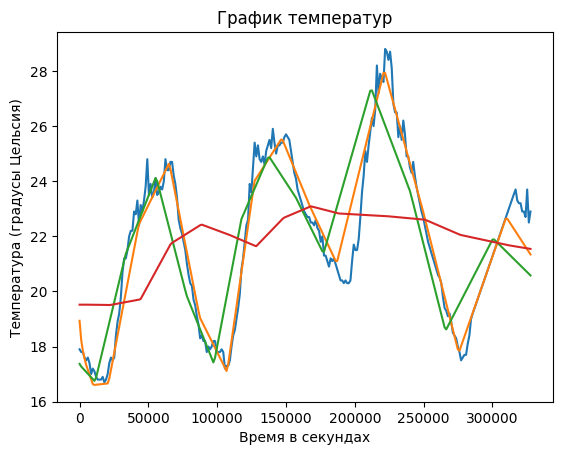

In [9]:
real = outer_temperature(df, 0, -max_shift)
time = time_column(df, 0, -max_shift)

predict_best = result[-1][3]
predict_mid = result[len(result) // 2][3]
predict_worst = result[0][3]

plt.plot(time[::4], real[::4])
plt.plot(time[::4], predict_best[::4])
plt.plot(time[::4], predict_mid[::4])
plt.plot(time[::4], predict_worst[::4])
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()